# Diabetes Prediction 

Import the Libraries

In [1]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Read the data from csv file

In [2]:
data = pd.read_csv('./dataset_diabetes/diabetic_data.csv')

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
print("Diabetes dataset dimensions : {}".format(data.shape))

Diabetes dataset dimensions : (101766, 50)


In [6]:
# Drop the columns irrelevant to the study, 'encounter_id', 'patient_nbr'
data.drop(['encounter_id', 'patient_nbr'], inplace=True, axis=1)


In [7]:
# Distribution of the target variable

data.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [8]:
data['readmitted'] = data['readmitted'].apply(lambda x: '1' if x=='<30' else 0)

In [9]:
data['readmitted'].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

array([[<AxesSubplot:title={'center':'admission_type_id'}>,
        <AxesSubplot:title={'center':'discharge_disposition_id'}>,
        <AxesSubplot:title={'center':'admission_source_id'}>],
       [<AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>],
       [<AxesSubplot:title={'center':'num_medications'}>,
        <AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>],
       [<AxesSubplot:title={'center':'number_inpatient'}>,
        <AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:>]], dtype=object)

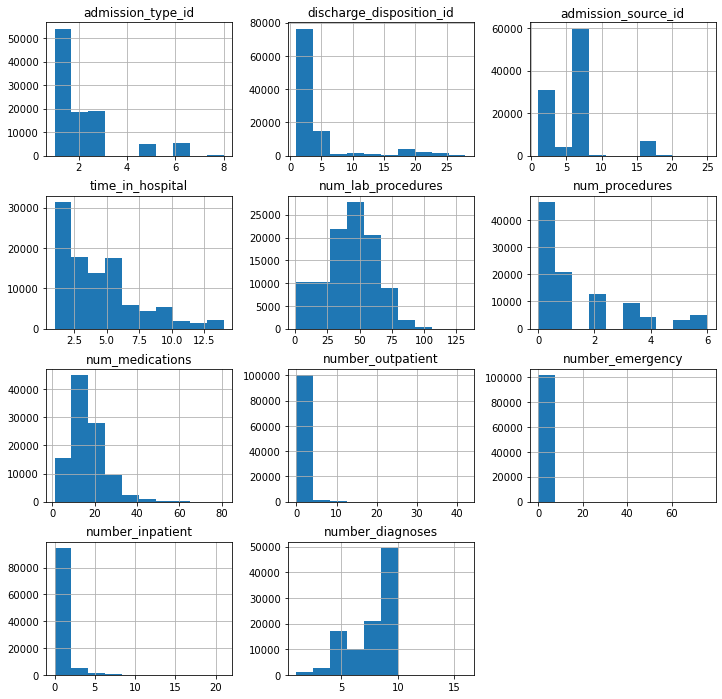

In [10]:
data.hist(figsize=(12, 12))

readmitted
0    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

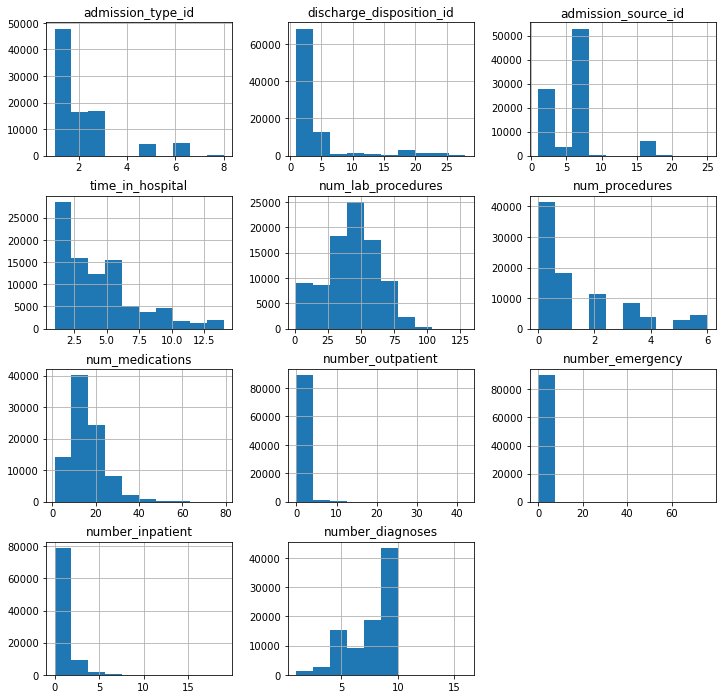

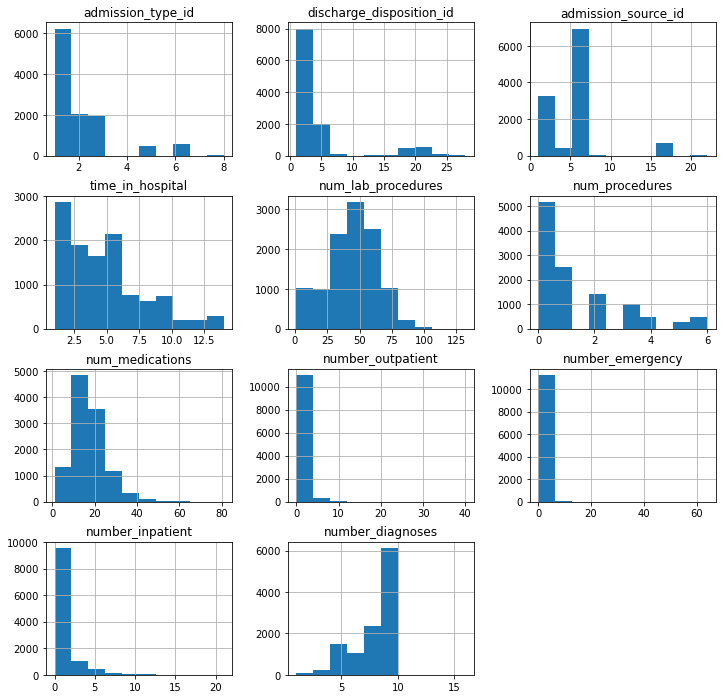

In [11]:
# Plot the graph
data.groupby('readmitted').hist(figsize=(12, 12))

<AxesSubplot:xlabel='number_outpatient', ylabel='Density'>

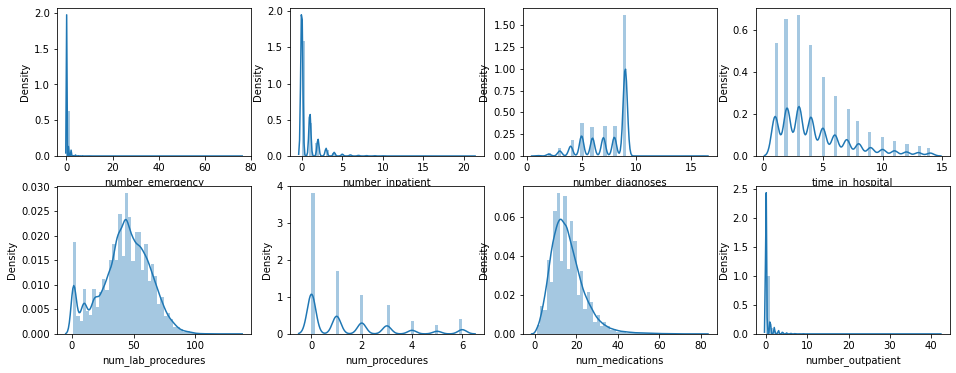

In [12]:
# plot the distribution of a variable from the dataset to see the skewness
# subplots

# subplot 1
plt.figure(figsize=(16, 6))
plt.subplot(2, 4, 1)
sns.distplot(data['number_emergency'])

# subplot 2
plt.subplot(2, 4, 2)
sns.distplot(data['number_inpatient'])

# subplot 3
plt.subplot(2, 4, 3)
sns.distplot(data['number_diagnoses'])

# subplot 4
plt.subplot(2, 4, 4)
sns.distplot(data['time_in_hospital'])

plt.subplot(2, 4, 5)
sns.distplot(data['num_lab_procedures'])

plt.subplot(2, 4, 6)
sns.distplot(data['num_procedures'])

plt.subplot(2, 4, 7)
sns.distplot(data['num_medications'])

plt.subplot(2, 4, 8)
sns.distplot(data['number_outpatient'])

#### 'number_inpatient', 'number_emergency', 'number_outpatient' are skewed. 

### Univariate Analysis

In [13]:
# converting readmitted to integer type
data['readmitted'] = data['readmitted'].apply(lambda x: pd.to_numeric(x))

In [14]:
# lets define a function to plot 'readmitted' across categorical variables

def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='readmitted', data=data)
    plt.show()

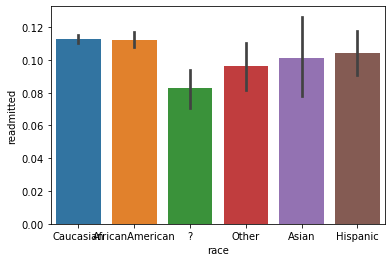

In [15]:
# race
# plotting race again 'readmitted'
plot_cat('race')

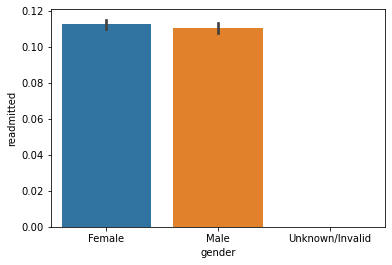

In [16]:
# gender
plot_cat('gender')

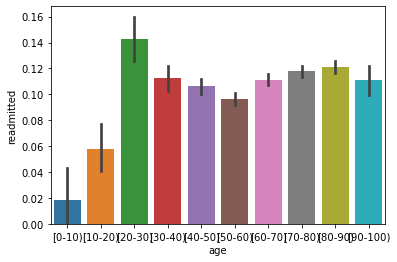

In [17]:
# age
plot_cat('age')

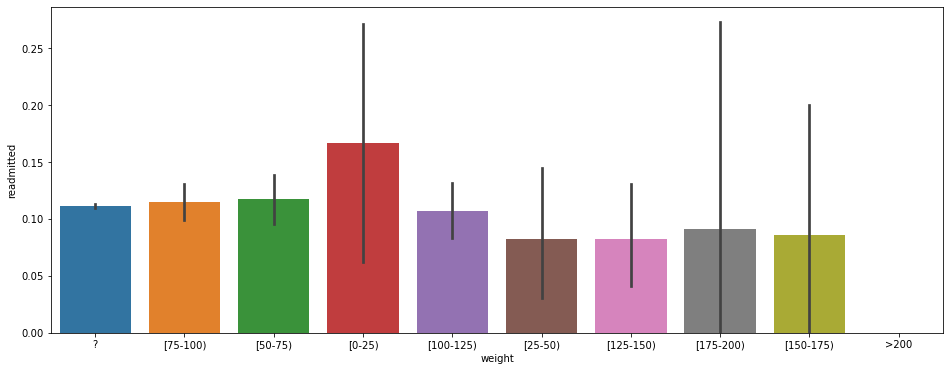

In [18]:
# weight
plt.figure(figsize=(16, 6))
plot_cat('weight')

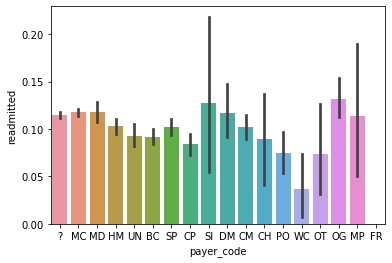

In [19]:
# payer code
plot_cat('payer_code')

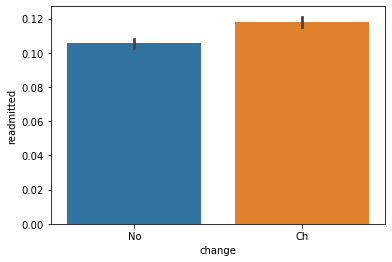

In [20]:
# change
plot_cat('change')

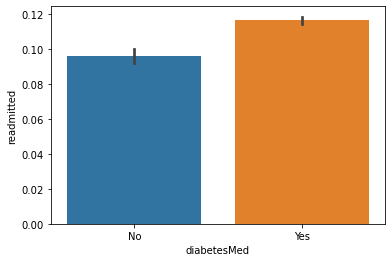

In [21]:
# diabetesMed
plot_cat('diabetesMed')

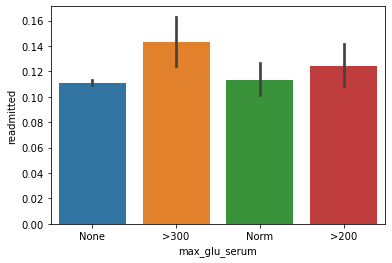

In [22]:
# max_glu_serum 
plot_cat('max_glu_serum')

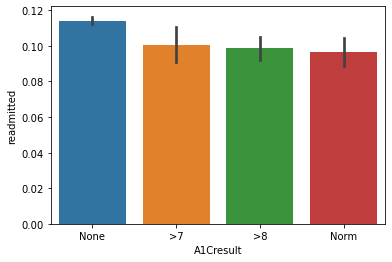

In [23]:
# A1Cresult
plot_cat('A1Cresult')

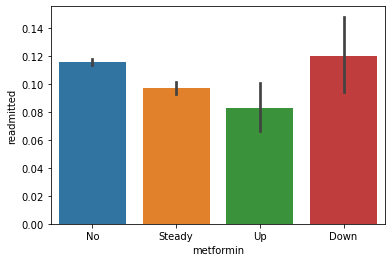

In [24]:
# metformin
plot_cat('metformin')

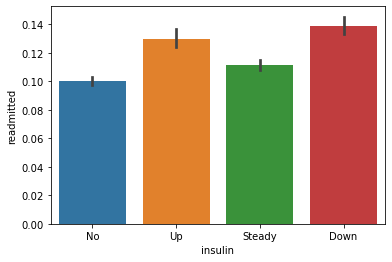

In [25]:
# insulin
plot_cat('insulin')

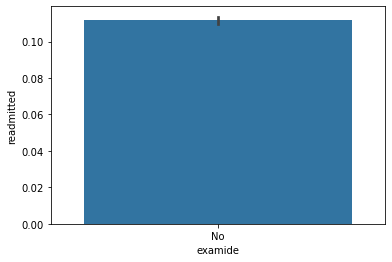

In [26]:
# examide
plot_cat('examide')

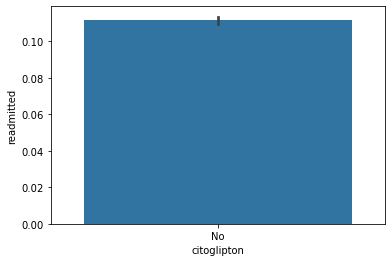

In [27]:
# citoglipton
plot_cat('citoglipton')

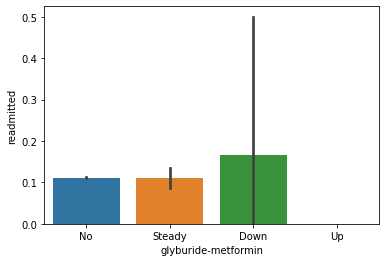

In [28]:
# glyburide-metformin
plot_cat('glyburide-metformin')

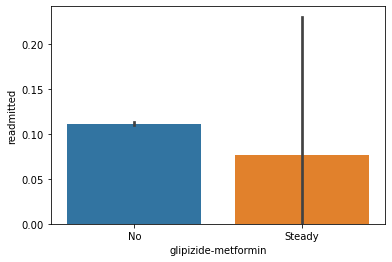

In [29]:
# glipizide-metformin
plot_cat('glipizide-metformin')

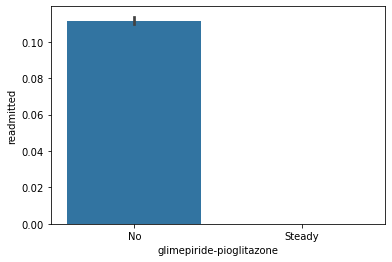

In [30]:
# glimepiride-pioglitazone
plot_cat('glimepiride-pioglitazone')

In [31]:
data['glimepiride-pioglitazone'].value_counts()

No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64

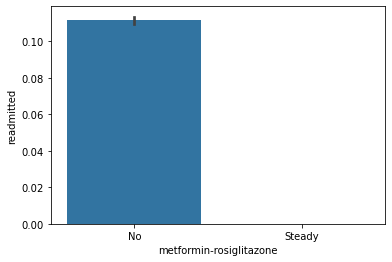

In [32]:
# metformin-rosiglitazone
plot_cat('metformin-rosiglitazone')

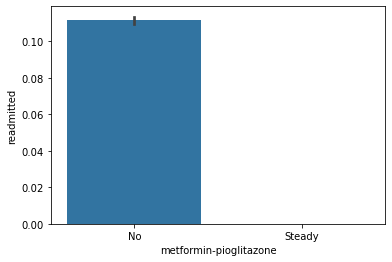

In [33]:
# metformin-pioglitazone
plot_cat('metformin-pioglitazone')

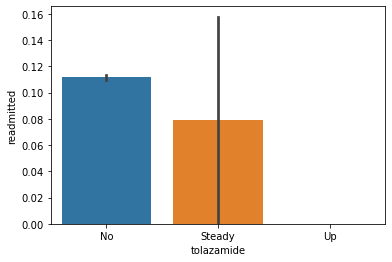

In [34]:
# tolazamide
plot_cat('tolazamide')

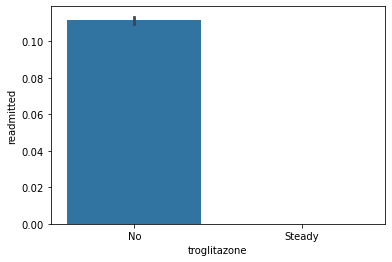

In [35]:
# troglitazone
plot_cat('troglitazone')

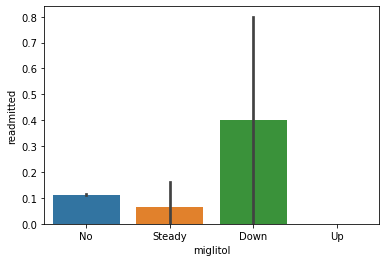

In [36]:
# miglitol
plot_cat('miglitol')

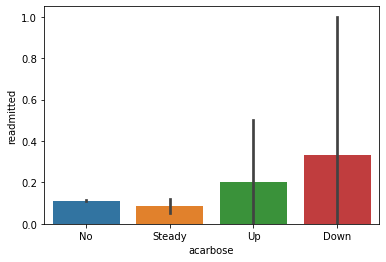

In [37]:
# acarbose
plot_cat('acarbose')

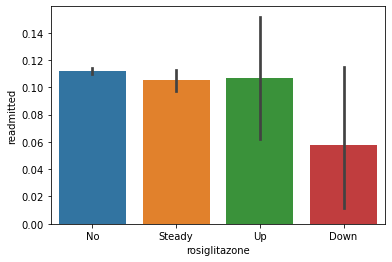

In [38]:
# rosiglitazone
plot_cat('rosiglitazone')

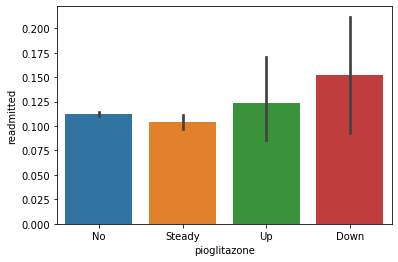

In [39]:
# pioglitazone
plot_cat('pioglitazone')

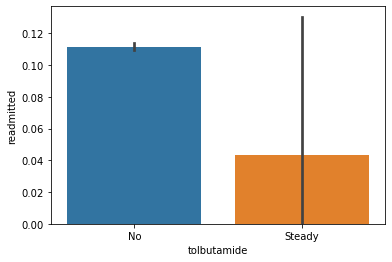

In [40]:
# tolbutamide
plot_cat('tolbutamide')

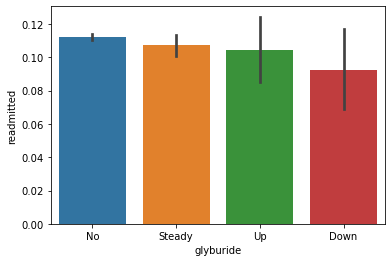

In [41]:
# glyburide
plot_cat('glyburide')

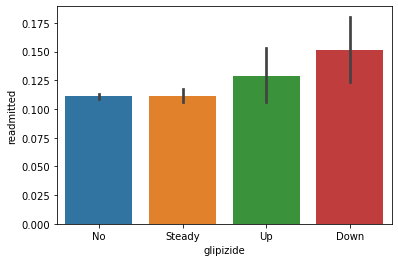

In [42]:
# glipizide
plot_cat('glipizide')

Analysis Results:
- troglitazone, metformin-pioglitazone, metformin-rosiglitazone, glimepiride-pioglitazone, citoglipton, examide, 
  shows no difference, so can be deleted.

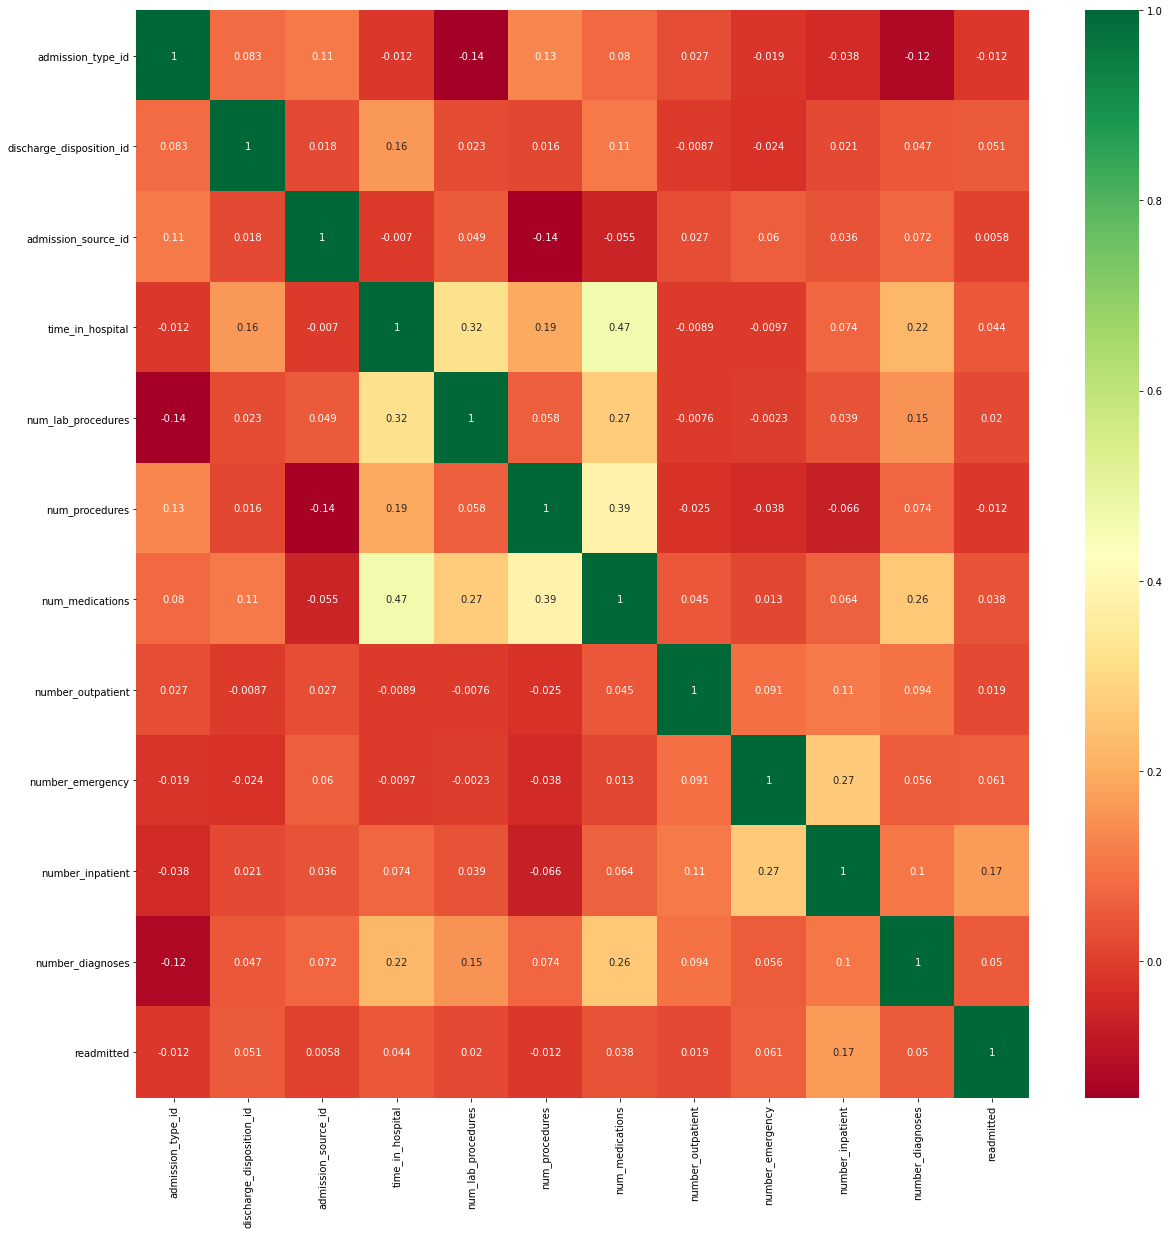

In [43]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### There is no such feature among the non-categorical variables that are highly correlated to target variable

### 1. Missing Value Imputation

In [44]:
# Find the Percentage of Missing Values in each columns and remove any if required.
data.isna().sum(axis=0)

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [45]:
# Replace missing value '?' with NAN
data.replace(to_replace='?', value=np.nan, inplace=True)

In [46]:
# count the percentage of missing value
data.isna().sum(axis=0)/len(data)*100

race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride 

#### 'weight', 'payer_code', 'medical_specialty' have high percentage of missing values, Ideally missing value greater than 50% are removed. So we remove 'weight'. 'medical_specialty' and 'payer_code' are considered to be high influencer by other reaserchers, so we keep them. Encode 'medical_specialty' as 'missing'.

In [47]:
# Drop the 'weight' column
data.drop('weight', inplace=True, axis=1)

In [48]:
# Replace missing values in 'medical_specialty' with value 'missing'
# data.medical_specialty.replace(to_replace=np.nan, value='missing', inplace=True)
data["medical_specialty"].fillna("Missing", inplace=True)

In [49]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,NaN,Missing,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,Missing,11,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,NaN,Missing,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,NaN,Missing,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [50]:
data.isna().sum(axis=0)/len(data)*100

race                         2.233555
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride                  0.000000
acetohexamid

In [51]:
data.shape

(101766, 47)

In [52]:
# Impute missing value of 'diag_1', 'diag_2', 'diag_3'
data.fillna(method='ffill', inplace=True)
data.isnull().sum(axis=0)/len(data)*100

race                         0.000000
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  20.091190
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000983
diag_3                       0.000983
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride                  0.000000
acetohexamid

In [53]:
# Replace Nan with zero's
data['diag_3'] = data['diag_3'].fillna(0)
data['diag_2'] = data['diag_2'].fillna(0)
data.isna().sum(axis=0)/len(data)*100

race                         0.00000
gender                       0.00000
age                          0.00000
admission_type_id            0.00000
discharge_disposition_id     0.00000
admission_source_id          0.00000
time_in_hospital             0.00000
payer_code                  20.09119
medical_specialty            0.00000
num_lab_procedures           0.00000
num_procedures               0.00000
num_medications              0.00000
number_outpatient            0.00000
number_emergency             0.00000
number_inpatient             0.00000
diag_1                       0.00000
diag_2                       0.00000
diag_3                       0.00000
number_diagnoses             0.00000
max_glu_serum                0.00000
A1Cresult                    0.00000
metformin                    0.00000
repaglinide                  0.00000
nateglinide                  0.00000
chlorpropamide               0.00000
glimepiride                  0.00000
acetohexamide                0.00000
g

### 2. Cleaning Data

In [54]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,NaN,Missing,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,Missing,11,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,NaN,Missing,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,NaN,Missing,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [55]:
# discharge_disposition, patient encounters related to 'expired' are removed
# 11	Expired
# 19	Expired at home. Medicaid only, hospice.
# 20	Expired in a medical facility. Medicaid only, hospice.
# 21	Expired, place unknown. Medicaid only, hospice.
data['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [56]:
# So we have 1642 patients who got expired, 
# remove them as we are intrested in understanding in learning the pattern of survial patients.
data.drop(data[data['discharge_disposition_id'] == 11].index, inplace=True)
data.drop(data[data['discharge_disposition_id'] == 19].index, inplace=True)
data.drop(data[data['discharge_disposition_id'] == 20].index, inplace=True)
data.drop(data[data['discharge_disposition_id'] == 21].index, inplace=True)
data.drop(data[data['discharge_disposition_id'] == 13].index, inplace=True)
data.drop(data[data['discharge_disposition_id'] == 14].index, inplace=True)

In [57]:
data['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
5      1184
25      989
4       815
7       623
23      412
28      139
8       108
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
Name: discharge_disposition_id, dtype: int64

In [58]:
data.shape

(99343, 47)

In [59]:
# 'examide’ and ‘citoglipton’ are listed as 'No' always, so remove them
data['examide'].value_counts()

No    99343
Name: examide, dtype: int64

In [60]:
data ['citoglipton'].value_counts()

No    99343
Name: citoglipton, dtype: int64

In [61]:
data.drop(['examide', 'citoglipton'], axis=1, inplace=True)

In [62]:
# Function to drop entire rows by the value of one column
def dropRowsbyColValue(colname,value):
    # Get index of rows with question marks in race column
    indexOfRows = data[data[colname] == value].index
    # Deleting rows by index
    data.drop(indexOfRows, inplace=True)

In [63]:
data['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [64]:
# drop rows of gender with 'Unknown/Invalid'
dropRowsbyColValue('gender','Unknown/Invalid')

### 3. Data reduction

In [65]:
# cluster ICD9 codes into 9 categories, Circulatory, Digestive, Diabetes, Injury,
# Genitourinary, Respiratory, Musculoskeletal, Neoplasms and Others.

def icd9_category(code_str):
    if (isinstance(code_str, str) and 
    (code_str.startswith('V') or 
     code_str.startswith ('E'))):
        return 'others'
    code = int(float(code_str))
    if code >= 250 and code < 251:
        return 'diabetes'
    elif code == 785 or (code >= 390 and code <= 459):
        return 'circulatory'
    elif code == 786 or (code >= 460 and code <= 519):
        return 'respiratory'
    elif code == 787 or (code >= 520 and code <= 579):
        return 'digestive'
    elif code >= 800 and code <= 999:
        return 'injury'
    elif code >= 710 and code <= 739:
        return 'musculoskeletal'
    elif code == '788'or (code >= 580 and code <= 629):
        return 'Genitourinary'
    elif (code == 780 or code == 781 or code == 784 or code == 782
          or (code >= 790 and code <= 799)
          or (code >= 140 and code < 250)
          or (code > 250 and code <= 279)
          or (code >= 680 and code <= 709)
          or (code >= 1 and code <= 139)
         ):
        return 'neoplasms'
    else:
        return 'others'
    

In [66]:
data['diag_1'] = data['diag_1'].apply(lambda x: icd9_category(x))
data['diag_2'] = data['diag_2'].apply(lambda x: icd9_category(x))
data['diag_3'] = data['diag_3'].apply(lambda x: icd9_category(x))

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99340 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99340 non-null  object
 1   gender                    99340 non-null  object
 2   age                       99340 non-null  object
 3   admission_type_id         99340 non-null  int64 
 4   discharge_disposition_id  99340 non-null  int64 
 5   admission_source_id       99340 non-null  int64 
 6   time_in_hospital          99340 non-null  int64 
 7   payer_code                79277 non-null  object
 8   medical_specialty         99340 non-null  object
 9   num_lab_procedures        99340 non-null  int64 
 10  num_procedures            99340 non-null  int64 
 11  num_medications           99340 non-null  int64 
 12  number_outpatient         99340 non-null  int64 
 13  number_emergency          99340 non-null  int64 
 14  number_inpatient     

In [68]:
# Categorise 'admission_type_id' and group based on the description

def ad_type(adm_code):
    if adm_code == 1 or adm_code == 2 or adm_code == 7:
        return 'Emergency'
    if adm_code == 5 or adm_code == 6 or adm_code == 8:
        return 'Not available'
    if adm_code == 3:
        return 'Elective'
    if adm_code == 4:
        return 'Newborn'
    return adm_code

data['admission_type_id'] = data['admission_type_id'].apply(lambda x: ad_type(x))

In [69]:
print (np.dtype(data['admission_type_id']))

object


In [70]:
# categorise 'medical specialty'
data['medical_specialty'].value_counts()

Missing                          48614
InternalMedicine                 14237
Emergency/Trauma                  7419
Family/GeneralPractice            7252
Cardiology                        5278
                                 ...  
SportsMedicine                       1
Psychiatry-Addictive                 1
Pediatrics-InfectiousDiseases        1
Perinatology                         1
Dermatology                          1
Name: medical_specialty, Length: 73, dtype: int64

#### There are 73 unique categorize, this has to be reduced

In [71]:
print (np.dtype(data['medical_specialty']))

object


In [72]:
data['medical_specialty'].value_counts()[:20]

Missing                              48614
InternalMedicine                     14237
Emergency/Trauma                      7419
Family/GeneralPractice                7252
Cardiology                            5278
Surgery-General                       3059
Nephrology                            1539
Orthopedics                           1392
Orthopedics-Reconstructive            1230
Radiologist                           1121
Pulmonology                            854
Psychiatry                             853
Urology                                682
ObstetricsandGynecology                669
Surgery-Cardiovascular/Thoracic        642
Gastroenterology                       538
Surgery-Vascular                       525
Surgery-Neuro                          462
PhysicalMedicineandRehabilitation      391
Oncology                               319
Name: medical_specialty, dtype: int64

In [73]:
data['medical_specialty'].value_counts()[20:40]

Pediatrics                  253
Neurology                   201
Hematology/Oncology         187
Pediatrics-Endocrinology    159
Otolaryngology              125
Endocrinology               119
Surgery-Thoracic            108
Psychology                  101
Podiatry                    100
Surgery-Cardiovascular       98
Pediatrics-CriticalCare      87
Hematology                   75
Gynecology                   58
Hospitalist                  57
Radiology                    53
Surgeon                      45
Surgery-Plastic              40
Osteopath                    38
Ophthalmology                38
InfectiousDiseases           37
Name: medical_specialty, dtype: int64

In [74]:
data['medical_specialty'].value_counts()[40:60]

SurgicalSpecialty                       33
Pediatrics-Pulmonology                  25
Obsterics&Gynecology-GynecologicOnco    25
Obstetrics                              19
Anesthesiology-Pediatric                19
Rheumatology                            17
Pathology                               16
OutreachServices                        12
Anesthesiology                          12
Surgery-Colon&Rectal                    11
PhysicianNotFound                       10
Pediatrics-Neurology                    10
Surgery-Maxillofacial                    9
Surgery-Pediatric                        8
Endocrinology-Metabolism                 8
Cardiology-Pediatric                     7
Psychiatry-Child/Adolescent              7
AllergyandImmunology                     7
DCPTEAM                                  5
Dentistry                                4
Name: medical_specialty, dtype: int64

In [75]:
data['medical_specialty'].value_counts()[60:73]

Pediatrics-Hematology-Oncology      4
Pediatrics-AllergyandImmunology     3
Pediatrics-EmergencyMedicine        3
Resident                            2
Neurophysiology                     1
Proctology                          1
Speech                              1
Surgery-PlasticwithinHeadandNeck    1
SportsMedicine                      1
Psychiatry-Addictive                1
Pediatrics-InfectiousDiseases       1
Perinatology                        1
Dermatology                         1
Name: medical_specialty, dtype: int64

In [76]:
# Group all the categorizes related to Surgery as one category "Surgery"
def group_surgery(x):
    if x.startswith('Surgery'):
        return 'Surgery'
    if x == 'Surgeon' or x == 'SurgicalSpecialty':
        return 'Surgery'
    return x
    
data['medical_specialty'] = data['medical_specialty'].apply(lambda x: group_surgery(x)) 

In [77]:
data['medical_specialty'].value_counts()

Missing                          48614
InternalMedicine                 14237
Emergency/Trauma                  7419
Family/GeneralPractice            7252
Cardiology                        5278
                                 ...  
SportsMedicine                       1
Pediatrics-InfectiousDiseases        1
Perinatology                         1
Psychiatry-Addictive                 1
Dermatology                          1
Name: medical_specialty, Length: 61, dtype: int64

In [78]:
# Group all the categorizes related to pediatrics as 'Pediatrics'
def group_pediatrics(x):
    if x.startswith('Pediatrics'):
        return 'Pediatrics'
    if x == 'Anesthesiology-Pediatric' or x == 'Cardiology-Pediatric':
        return 'Pediatrics'
    return x

data['medical_specialty'] = data['medical_specialty'].apply(lambda x: group_pediatrics(x))

In [79]:
data['medical_specialty'].value_counts()/len(data) * 100

Missing                                 48.936984
InternalMedicine                        14.331588
Emergency/Trauma                         7.468291
Family/GeneralPractice                   7.300181
Cardiology                               5.313066
Surgery                                  5.074492
Nephrology                               1.549225
Orthopedics                              1.401248
Orthopedics-Reconstructive               1.238172
Radiologist                              1.128448
Pulmonology                              0.859674
Psychiatry                               0.858667
Urology                                  0.686531
ObstetricsandGynecology                  0.673445
Pediatrics                               0.574794
Gastroenterology                         0.541574
PhysicalMedicineandRehabilitation        0.393598
Oncology                                 0.321119
Neurology                                0.202335
Hematology/Oncology                      0.188242


In [80]:
# Replace PhysicianNotFound as Missing
data['medical_specialty'] = data['medical_specialty'].replace('PhysicianNotFound', 'Missing')

# Replace Family/GeneralPractice with InternalMedicine
data['medical_specialty'] = data['medical_specialty'].replace(['Family/GeneralPractice', 'Hospitalist', 'InfectiousDiseases'], 'InternalMedicine' )

data['medical_specialty'] = data['medical_specialty'].replace(['Orthopedics-Reconstructive', 'SportsMedicine', 'Rheumatology'], 'Orthopedics')

data['medical_specialty'] = data['medical_specialty'].replace(['Perinatology', 'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology', 'Gynecology'], 'Obstetrics')

data['medical_specialty'] = data['medical_specialty'].replace('Radiologist', 'Radiology')



In [81]:
data['medical_specialty'].value_counts()/len(data) * 100

Missing                              48.947051
InternalMedicine                     21.726394
Emergency/Trauma                      7.468291
Cardiology                            5.313066
Surgery                               5.074492
Orthopedics                           2.657540
Nephrology                            1.549225
Radiology                             1.181800
Pulmonology                           0.859674
Psychiatry                            0.858667
Obstetrics                            0.777129
Urology                               0.686531
Pediatrics                            0.574794
Gastroenterology                      0.541574
PhysicalMedicineandRehabilitation     0.393598
Oncology                              0.321119
Neurology                             0.202335
Hematology/Oncology                   0.188242
Otolaryngology                        0.125830
Endocrinology                         0.119791
Psychology                            0.101671
Podiatry     

In [82]:
sr = (data['medical_specialty'].value_counts()/len(data) * 100) < 0.4
data['medical_specialty'] = data['medical_specialty'].replace(sr[sr].index, 'Others')

In [83]:
data['medical_specialty'].value_counts()/len(data) * 100

Missing             48.947051
InternalMedicine    21.726394
Emergency/Trauma     7.468291
Cardiology           5.313066
Surgery              5.074492
Orthopedics          2.657540
Others               1.783773
Nephrology           1.549225
Radiology            1.181800
Pulmonology          0.859674
Psychiatry           0.858667
Obstetrics           0.777129
Urology              0.686531
Pediatrics           0.574794
Gastroenterology     0.541574
Name: medical_specialty, dtype: float64

In [84]:
# Cluster 'admission_source_id'
data['admission_source_id'].value_counts()

7     55848
1     29167
17     6570
4      3118
6      2239
2      1081
5       806
3       185
20      159
9       125
8        15
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

#### admission_source_id has 26 distinct values

In [85]:
# combine 15, 17, 20, 21 to 9 (Not Available)
data['admission_source_id'] = data['admission_source_id'].replace([15, 17, 20, 21], 9)


In [86]:
data['admission_source_id'].value_counts()

7     55848
1     29167
9      6854
4      3118
6      2239
2      1081
5       806
3       185
8        15
22       12
10        8
25        2
14        2
11        2
13        1
Name: admission_source_id, dtype: int64

In [87]:
# Replace 10, 25 with 7 (Emergency Room)
# Replace 5, 6, 22 with 4 (Transfer from Hospital)
# Replace 3 with 1 (Physicial Referral)
# Replace others as 27(Others)
data['admission_source_id'] = data['admission_source_id'].replace([10, 25], 7)
data['admission_source_id'] = data['admission_source_id'].replace([5, 6, 22], 4)
data['admission_source_id'] = data['admission_source_id'].replace(3, 1)
data['admission_source_id'] = data['admission_source_id'].replace([8, 14, 11, 13], 27)
data['admission_source_id'].value_counts()

7     55858
1     29352
9      6854
4      6175
2      1081
27       20
Name: admission_source_id, dtype: int64

In [88]:
# Cluster the 'discharge_disposition_id
# check the unique values
data['discharge_disposition_id'].value_counts()

1     60232
3     13954
6     12902
18     3691
2      2128
22     1992
5      1184
25      989
4       815
7       623
23      412
28      139
8       108
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
Name: discharge_disposition_id, dtype: int64

In [89]:
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(
    [3, 4, 5, 6, 8, 10, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30], 2)
data['discharge_disposition_id'].value_counts()

1     60232
2     33781
18     3691
25      989
7       623
9        21
12        3
Name: discharge_disposition_id, dtype: int64

In [90]:
data['readmitted'].value_counts()

0    88026
1    11314
Name: readmitted, dtype: int64

In [91]:
# We are interested in patients who got readmitted < 30, so combine 'No' and '>30'
# so encode <30 as readmitted=1 an rest as 0
data['readmitted'] = data['readmitted'].replace('<30', 1)
data['readmitted'] = data['readmitted'].replace(['>30', 'NO'], 0)

In [92]:
data['readmitted'].value_counts()

0    88026
1    11314
Name: readmitted, dtype: int64

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99340 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99340 non-null  object
 1   gender                    99340 non-null  object
 2   age                       99340 non-null  object
 3   admission_type_id         99340 non-null  object
 4   discharge_disposition_id  99340 non-null  int64 
 5   admission_source_id       99340 non-null  int64 
 6   time_in_hospital          99340 non-null  int64 
 7   payer_code                79277 non-null  object
 8   medical_specialty         99340 non-null  object
 9   num_lab_procedures        99340 non-null  int64 
 10  num_procedures            99340 non-null  int64 
 11  num_medications           99340 non-null  int64 
 12  number_outpatient         99340 non-null  int64 
 13  number_emergency          99340 non-null  int64 
 14  number_inpatient     

In [94]:
data.isna().sum(axis=0)/len(data)*100

race                         0.000000
gender                       0.000000
age                          0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  20.196296
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride                  0.000000
acetohexamid

### Feature Creation

In [95]:
# Combine 'number_inpatient', 'number_outpatient' 'number_emergency' to derive new feature, 'service_utilization'
data['service_utilization'] = data[['number_inpatient', 'number_outpatient','number_emergency']].sum(axis=1)
data[['service_utilization', 'number_inpatient', 'number_outpatient', 'number_emergency']].head()

,service_utilization,number_inpatient,number_outpatient,number_emergency
0,0,0,0,0
1,0,0,0,0
2,3,1,2,0
3,0,0,0,0
4,0,0,0,0


In [96]:
# columns of all the 20 medication
columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'] 
print (columns)

['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [97]:
# Combine, UP+Down as 'medication_change' considering all the 20 medication used
count = 0
data['medication_change'] = np.nan
for i, row in data.iterrows():
    row  = list(row)
    data['medication_change'][i] = row.count('Up') + row.count('Down')
    
data['medication_change'] = data['medication_change'].astype('int64')

In [98]:
data['medication_change'].head()

0    0
1    1
2    0
3    1
4    0
Name: medication_change, dtype: int64

In [99]:
# Get the total medication used, Up+Down+Steady
data['count_of_medication'] = np.nan
for i, row in data.iterrows():
    row  = list(row)
    data['count_of_medication'][i] = row.count('Up') + row.count('Down') + row.count('Steady')
    
data['count_of_medication'] = data['count_of_medication'].astype('int64')

In [100]:
data['count_of_medication'].head()

0    0
1    1
2    1
3    1
4    2
Name: count_of_medication, dtype: int64

### Log Transformation

Numeric variables "number_inpatient”, “number_outpatient”, “number_emergency" are skewed as we saw in the graphs

In [101]:
print('skew ratio for number_inpatient =', data['number_inpatient'].skew())
print('skew ratio for number_outpatient =', data['number_outpatient'].skew())
print('skew ratio for number_emergency =', data['number_emergency'].skew())

skew ratio for number_inpatient = 3.633364965761238
skew ratio for number_outpatient = 8.839543644977354
skew ratio for number_emergency = 22.848462012319096


In [102]:
to_log = ['number_inpatient', 'number_outpatient', 'number_emergency']

data[to_log] = data[to_log].applymap(lambda x: np.log(x+1))

<AxesSubplot:xlabel='number_outpatient', ylabel='Density'>

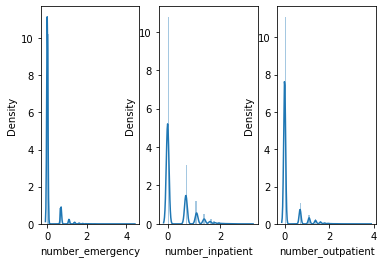

In [103]:
plt.subplot(1, 3, 1)
sns.distplot(data['number_emergency'])

plt.subplot(1, 3, 2)
sns.distplot(data['number_inpatient'])

plt.subplot(1, 3, 3)
sns.distplot(data['number_outpatient'])

In [104]:
print('skew ratio for number_inpatient =', data['number_inpatient'].skew())
print('skew ratio for number_outpatient =', data['number_outpatient'].skew())
print('skew ratio for number_emergency =', data['number_emergency'].skew())

skew ratio for number_inpatient = 1.4550640935683798
skew ratio for number_outpatient = 2.736857795422908
skew ratio for number_emergency = 3.6663175832285333


<AxesSubplot:xlabel='service_utilization', ylabel='Density'>

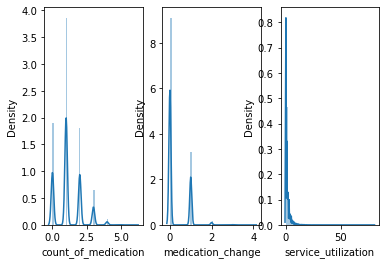

In [105]:
# check the distributions of the newly created variables
plt.subplot(1, 3, 1)
sns.distplot(data['count_of_medication'])

plt.subplot(1, 3, 2)
sns.distplot(data['medication_change'])

plt.subplot(1, 3, 3)
sns.distplot(data['service_utilization'])

<AxesSubplot:xlabel='service_utilization', ylabel='Density'>

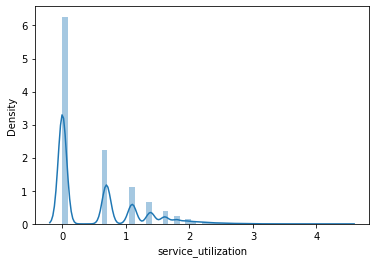

In [106]:
# service_utilization if higly skewed, so transform it
data['service_utilization'] = data['service_utilization'].apply(lambda x: np.log(x+1))
sns.distplot(data['service_utilization'])

### Standardization

In [107]:
data.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,service_utilization,medication_change,count_of_medication
count,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000,99340.000000
mean,2.250282,5.128307,4.379364,42.907198,1.334196,15.979052,0.172196,0.101920,0.323910,7.401752,0.113892,0.512629,0.287377,1.187367
std,3.936027,2.884748,2.968393,19.609887,1.702770,8.094931,0.429302,0.315510,0.509925,1.940990,0.317681,0.662199,0.487866,0.922431
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.693147,9.000000,0.000000,1.098612,1.000000,2.000000
max,25.000000,27.000000,14.000000,132.000000,6.000000,81.000000,3.761200,4.343805,3.091042,16.000000,1.000000,4.394449,4.000000,6.000000


In [108]:
# Standardize the data, where each of the numerical values are scaled to bring them on the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_std = data.drop('readmitted', axis=1).select_dtypes([np.number]).columns
for col in cols_std:
     data[col] = scaler.fit_transform(data[[col]])

In [109]:
data.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,service_utilization,medication_change,count_of_medication
count,9.934000e+04,9.934000e+04,9.934000e+04,9.934000e+04,9.934000e+04,9.934000e+04,9.934000e+04,9.934000e+04,9.934000e+04,9.934000e+04,99340.000000,9.934000e+04,9.934000e+04,9.934000e+04
mean,4.137846e-15,4.300641e-14,-3.683409e-15,-2.440072e-15,1.401074e-14,-2.864534e-15,-9.471619e-14,1.364718e-13,6.933367e-15,3.974335e-14,0.113892,6.734185e-14,5.207491e-14,-4.502445e-14
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.317681,1.000005e+00,1.000005e+00,1.000005e+00
min,-3.176524e-01,-1.431088e+00,-1.138455e+00,-2.137055e+00,-7.835482e-01,-1.850433e+00,-4.011100e-01,-3.230340e-01,-6.352135e-01,-3.298205e+00,0.000000,-7.741353e-01,-5.890517e-01,-1.287220e+00
25%,-3.176524e-01,-1.431088e+00,-8.015704e-01,-6.072068e-01,-7.835482e-01,-7.386204e-01,-4.011100e-01,-3.230340e-01,-6.352135e-01,-7.221873e-01,0.000000,-7.741353e-01,-5.890517e-01,-2.031236e-01
50%,-3.176524e-01,6.488270e-01,-1.278017e-01,5.572740e-02,-1.962669e-01,-1.209469e-01,-4.011100e-01,-3.230340e-01,-6.352135e-01,3.082197e-01,0.000000,-7.741353e-01,-5.890517e-01,-2.031236e-01
75%,-6.358776e-02,6.488270e-01,5.459669e-01,7.186616e-01,3.910144e-01,4.967267e-01,-4.011100e-01,-3.230340e-01,7.241044e-01,8.234232e-01,0.000000,8.849105e-01,1.460703e+00,8.809733e-01
max,5.779898e+00,7.581876e+00,3.241042e+00,4.543282e+00,2.740140e+00,8.032344e+00,8.360136e+00,1.344460e+01,5.426572e+00,4.429848e+00,1.000000,5.862048e+00,7.609967e+00,5.217361e+00


#### So, we have std-deviation = '1' and mean = nearly equal to '0' 

### Outlier Removal

In [110]:
#from scipy import stats
#import numpy as np
#z = np.abs(stats.zscore(data))
#print(z)

#threshold = 3
#print(np.where(z > 3))

In [111]:
#data_o = data[(z < 3).all(axis=1)]
#data_o.shape

In [112]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization,medication_change,count_of_medication
0,Caucasian,Female,[0-10),Not available,5.779898,-1.431088,-1.138455,NaN,Pediatrics,-0.097257,...,No,No,No,No,No,No,0,-0.774135,-0.589052,-1.287220
1,Caucasian,Female,[10-20),Emergency,-0.317652,0.648827,-0.464686,NaN,Missing,0.820652,...,No,No,No,No,Ch,Yes,0,-0.774135,1.460703,-0.203124
2,AfricanAmerican,Female,[20-30),Emergency,-0.317652,0.648827,-0.801570,NaN,Missing,-1.627106,...,No,No,No,No,No,Yes,0,1.319347,-0.589052,-0.203124
3,Caucasian,Male,[30-40),Emergency,-0.317652,0.648827,-0.801570,NaN,Missing,0.055727,...,No,No,No,No,Ch,Yes,0,-0.774135,1.460703,-0.203124
4,Caucasian,Male,[40-50),Emergency,-0.317652,0.648827,-1.138455,NaN,Missing,0.412692,...,No,No,No,No,Ch,Yes,0,-0.774135,-0.589052,0.880973


### Feature encoding

In [113]:
data['readmitted'].head()

0    0
1    0
2    0
3    0
4    0
Name: readmitted, dtype: int64

In [114]:
data['change'].head()

0    No
1    Ch
2    No
3    Ch
4    Ch
Name: change, dtype: object

In [115]:
data['change'] = data['change'].apply(lambda x: 0 if x=='No' else 1)

In [116]:
data['change'].head()


0    0
1    1
2    0
3    1
4    1
Name: change, dtype: int64

In [117]:
data['diabetesMed'].head()

0     No
1    Yes
2    Yes
3    Yes
4    Yes
Name: diabetesMed, dtype: object

In [118]:
data['diabetesMed'].value_counts()

Yes    76717
No     22623
Name: diabetesMed, dtype: int64

In [119]:
data['diabetesMed'] = data['diabetesMed'].apply(lambda x: 0 if x=='No' else 1)
data['diabetesMed'].head()

0    0
1    1
2    1
3    1
4    1
Name: diabetesMed, dtype: int64

In [120]:
data['gender'].value_counts()

Female    53454
Male      45886
Name: gender, dtype: int64

In [121]:
def encode_gender(x):
    if x=='Male':
        return 1
    elif x=='Female':
        return 0

data['gender'] = data['gender'].apply(lambda x: encode_gender(x))

In [122]:
data['age'].value_counts()

[70-80)     25329
[60-70)     22058
[50-60)     17060
[80-90)     16434
[40-50)      9607
[30-40)      3764
[90-100)     2589
[20-30)      1649
[10-20)       690
[0-10)        160
Name: age, dtype: int64

In [123]:
# encode_age(x):
ageranks = data['age'].unique()
ageranks = list(ageranks)
for i in ageranks:
    value = i
    newvalue = int(i[1])*10+5
    data.loc[(data.age == value),'age'] = newvalue


In [124]:
data['age'].unique()

array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95], dtype=object)

In [125]:
data['age'] = data['age'].astype(np.int64)

In [126]:
data['age'].unique()

array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95])

In [127]:
data['admission_type_id'].value_counts()

Emergency        70519
Elective         18667
Not available    10144
Newborn             10
Name: admission_type_id, dtype: int64

In [128]:
def encode_ad_type(x):
    if x == 'Emergency':
        return 1
    if x == 'Elective':
        return 3
    if x == 'Not available':
        return 5
    if x == 'Newborn':
        return 4
data['admission_type_id'] = data['admission_type_id'].apply(lambda x: encode_ad_type(x))

In [129]:
data['admission_type_id'].unique()

array([5, 1, 3, 4])

In [130]:
data = pd.get_dummies(data, prefix_sep='_', drop_first=True)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99340 entries, 0 to 101765
Columns: 131 entries, gender to metformin-pioglitazone_Steady
dtypes: float64(13), int64(6), uint8(112)
memory usage: 28.3 MB


In [132]:
data.columns

Index(['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       ...
       'insulin_No', 'insulin_Steady', 'insulin_Up', 'glyburide-metformin_No',
       'glyburide-metformin_Steady', 'glyburide-metformin_Up',
       'glipizide-metformin_Steady', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_Steady', 'metformin-pioglitazone_Steady'],
      dtype='object', length=131)

#### With this all the features are converted to numerical

### Feature selection

In [133]:
# Putting feature variable to X
X = data.drop('readmitted',axis=1)

# Putting response variable to y
y = data['readmitted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [134]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
feature_imp = pd.DataFrame(rfc.feature_importances_, index=X.columns,
                           columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
num_lab_procedures,8.243801e-02
num_medications,7.365322e-02
time_in_hospital,5.431118e-02
age,4.580852e-02
num_procedures,3.728001e-02
...,...
glimepiride-pioglitazone_Steady,9.021402e-07
miglitol_Up,6.680785e-07
tolazamide_Up,4.633826e-07
metformin-rosiglitazone_Steady,1.506120e-07


<AxesSubplot:>

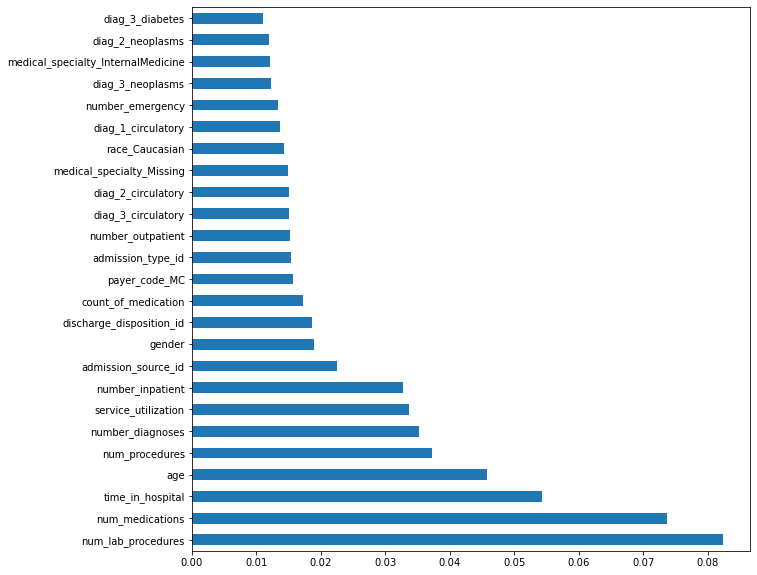

In [136]:
# plot feature importance
features = pd.Series(rfc.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))

features.nlargest(25).plot(kind='barh')


In [137]:
print ("Important features:\n\n",features.nlargest(25))

Important features:

 num_lab_procedures                    0.082438
num_medications                       0.073653
time_in_hospital                      0.054311
age                                   0.045809
num_procedures                        0.037280
number_diagnoses                      0.035218
service_utilization                   0.033639
number_inpatient                      0.032681
admission_source_id                   0.022563
gender                                0.018952
discharge_disposition_id              0.018689
count_of_medication                   0.017209
payer_code_MC                         0.015639
admission_type_id                     0.015414
number_outpatient                     0.015248
diag_3_circulatory                    0.015124
diag_2_circulatory                    0.014985
medical_specialty_Missing             0.014891
race_Caucasian                        0.014230
diag_1_circulatory                    0.013719
number_emergency                      

In [138]:
columns = list(features.nlargest(25).index)
print (type(columns))
print (columns)

<class 'list'>
['num_lab_procedures', 'num_medications', 'time_in_hospital', 'age', 'num_procedures', 'number_diagnoses', 'service_utilization', 'number_inpatient', 'admission_source_id', 'gender', 'discharge_disposition_id', 'count_of_medication', 'payer_code_MC', 'admission_type_id', 'number_outpatient', 'diag_3_circulatory', 'diag_2_circulatory', 'medical_specialty_Missing', 'race_Caucasian', 'diag_1_circulatory', 'number_emergency', 'diag_3_neoplasms', 'medical_specialty_InternalMedicine', 'diag_2_neoplasms', 'diag_3_diabetes']


In [139]:
columns.append('readmitted')
data_top25_dfeatures = data[columns]
data_top25_dfeatures.head()

,num_lab_procedures,num_medications,time_in_hospital,age,num_procedures,number_diagnoses,service_utilization,number_inpatient,admission_source_id,gender,...,diag_2_circulatory,medical_specialty_Missing,race_Caucasian,diag_1_circulatory,number_emergency,diag_3_neoplasms,medical_specialty_InternalMedicine,diag_2_neoplasms,diag_3_diabetes,readmitted
0,-0.097257,-1.850433,-1.138455,5,-0.783548,-3.298205,-0.774135,-0.635213,-1.431088,0,...,0,0,1,0,-0.323034,0,0,0,0,0
1,0.820652,0.249657,-0.464686,15,-0.783548,0.823423,-0.774135,-0.635213,0.648827,0,...,0,1,1,0,-0.323034,1,0,0,0,0
2,-1.627106,-0.368016,-0.801570,25,2.152858,-0.722187,1.319347,0.724104,0.648827,0,...,0,1,0,0,-0.323034,0,0,0,0,0
3,0.055727,0.002588,-0.801570,35,-0.196267,-0.206984,-0.774135,-0.635213,0.648827,1,...,0,1,1,0,-0.323034,0,0,0,0,0
4,0.412692,-0.985690,-1.138455,45,-0.783548,-1.237391,-0.774135,-0.635213,0.648827,1,...,0,1,1,0,-0.323034,0,0,1,1,0


In [140]:
data_top25_dfeatures.shape

(99340, 26)

In [141]:
data.shape

(99340, 131)

In [142]:
data_top25_dfeatures.to_csv(path_or_buf="./data_top25_dfeatures.csv", index=False)

In [143]:
# data without feature selection
data.to_csv(path_or_buf="./data_all_dfeatures.csv", index=False)